# CSCE 633 :: Machine Learning :: Texas A&M University :: Fall 2023

# Homework 4 (HW-4)
**Name: Shwetima Sakshi**  
**UIN: 934008489**  
**Due on Tue, Nov 28, by 11:59 PM.**

## (a) Data exploration. 

In [17]:
# Import the libraries required
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.mixture import GaussianMixture

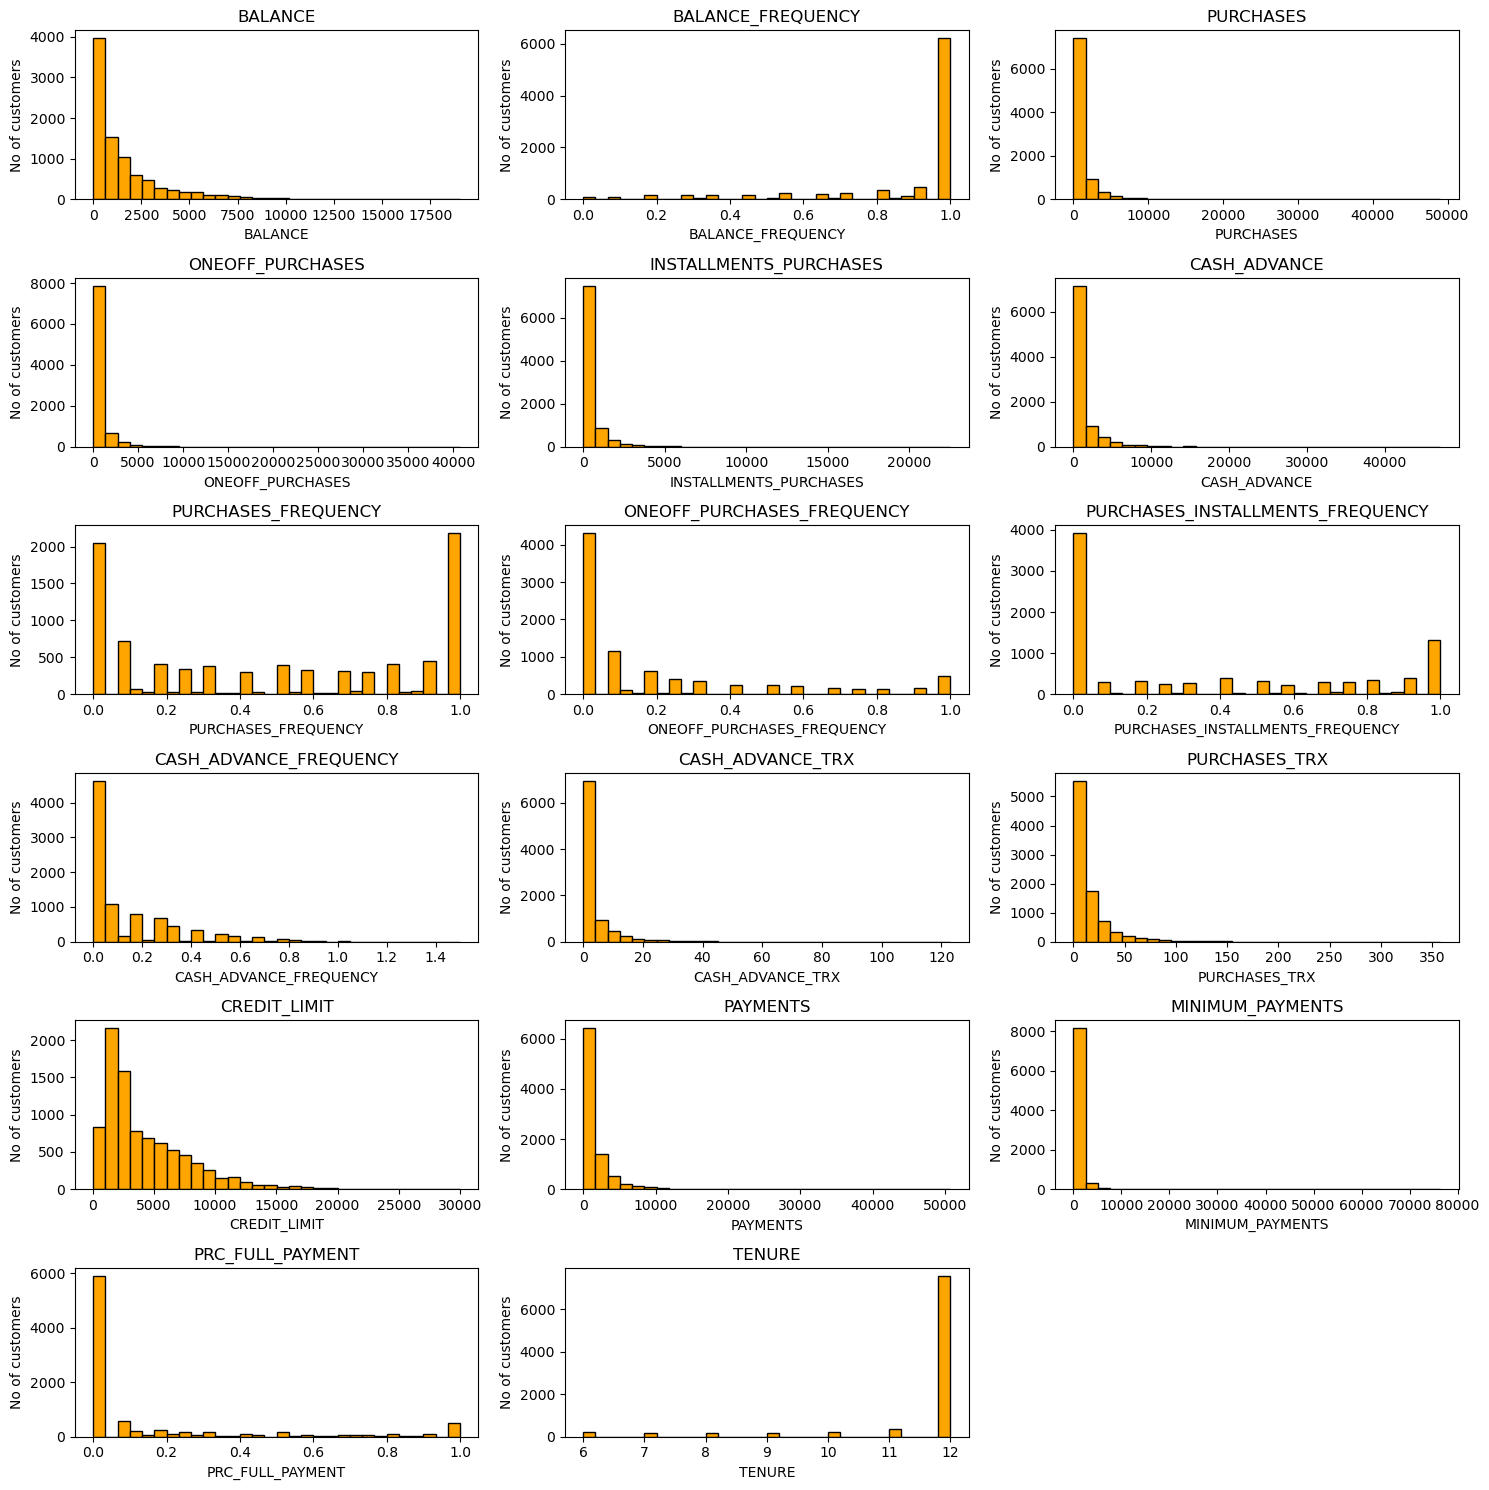

In [18]:
# Load the data
data = pd.read_csv('/Users/shwetimasakshi/Desktop/DF/ML/HW4/data.csv')

# Columns of interest are 2-18, thus exclude first column
columns_of_interest = data.columns[1:]
data_of_interest = data[columns_of_interest]

# Plot histograms
plt.figure(figsize=(15, 15))

for i, column in enumerate(columns_of_interest):
    plt.subplot(6, 3, i+1)
    plt.hist(data_of_interest[column], bins=30, color='orange', edgecolor='black')
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('No of customers')

plt.tight_layout()
plt.show()


We can draw following conclusions from the above histograms:
1. The balance is less than 7500 for majority customers, out of which most have the balance around 600.
2. The balance frequency is 1 for most of the customers which implies that blance is updated frequently for majority customers.
3. Purchase value is less than 10,000 for a large number of customers, preciseley concentrated towards a value of around 2000.
4. Maximum number of customers are doing one off purchases. The amount of these being less than 5000.
5. Maximum number of customers are doing one off purchases. The amount of these being less than 5000.
Combining 4 and 5 we can say that the frequency of one off purchases is a little more than installment purchases, however the purchase amount is less than 5000 in each case.
6. Mostly the customers are not giving cash in advance.
7. Around 2000 customers have purchase frequency of 0 and around 2000 customers have purchase frequency of 1. The remaining customers are almost evenly distributed over different purchase frequencies.
8. Around 4000 customers have 0 one off purchase frequency.
9. Around 4000 customers have 0 installments purchase frequency. We can conclude from 7,8 and 9 that mostly the customers who are making a purchase have almost equal frequency of either making a one off or installment purchase.
10. Most of the customers are not paying cas in advance.
11. Number of transactions made with ”Cash in Advanced” is o for most of the customers.
12. Number of purchase transactions is 0 for most of the customers.
13. Credit card limit is 2000 for around 22% custopmers. It is 3000 for around 16% custiomers. Mostly customers have credit card limit below 5000.
14. Most of the customers have made a payment of around 2000.
15. Around 90% of the customers have a minimum payment of around 3000.
16. Most of the customers have done a negligible percentage of full payment. This implies mostly customers do not make full payment.
17. Tenure of credit card service for most of the customers is 12.



### (b) Data exploration.

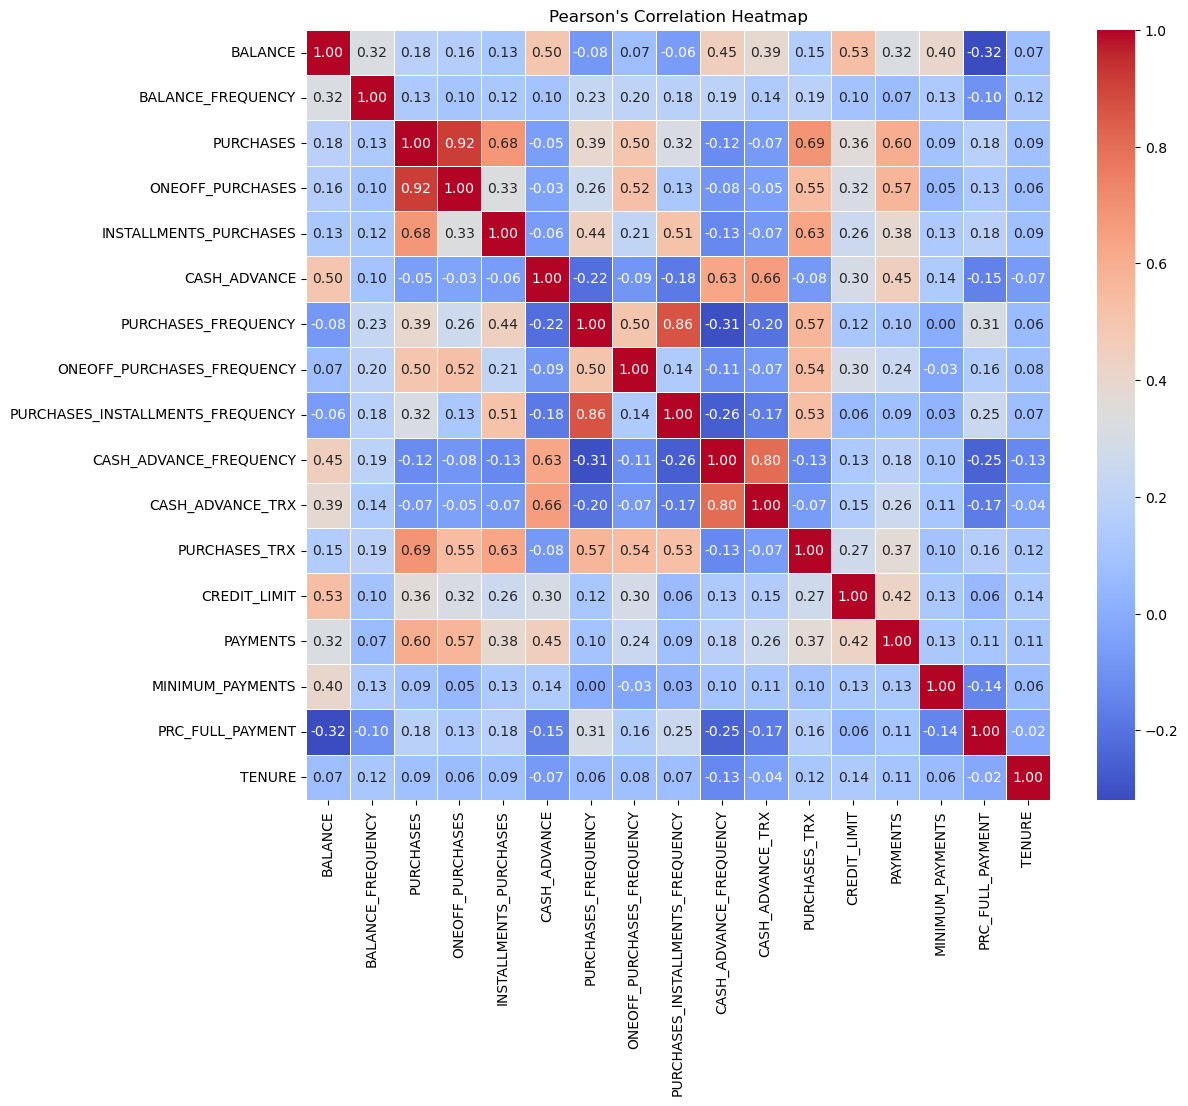

In [19]:
# Compute Pearson's correlation matrix
correlation_matrix = data_of_interest.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title("Pearson's Correlation Heatmap")
plt.show()


Vizuzlization of the resulting heatmap:
1. Strong positive correlations are represented by values closer to 1 which implies that these varuiables are directly proportional and highly corelated.
2. Strong negative correlations are represented by values closer to -1 which implies that these varuiables are inversely proportional and highly corelated.
3. No correlation are represented by values close to 0.

We observe that:
1. Purchases are strongly and directly correlated with one off purchases. This means if purchase amount is increasing, then it means it is because of one off purchase amount increase.
2. Purchase frequency and purchase installment frquency are strongly and directly correlated which means that if the number of purchases increase, then these are mostly installment purchases.
3. Cash advance frequency and Cash advance transaction  are strongly and directly correlated which means if the users are paying advance cash, advance cash transaction count will increase.
4. Balance and prc full payment are strongly and inversely correlated which means that if there is an increase in the balance amount left then it impliues less full payments are made.
5. Purchase frequency and cash advance frequency are inversely correlated it means that for most of the purchases the cash amount is not being paid.
6. Installment purchase and cash advance transaction are weakly inversely correlated values as the value of correlation is -0.07. Similarly we can see credit limit and one off purchase frequency are weekly directly correlated as the correlation value is 0.32.
In the same way by looking at the correlation values between any two features we can deduce the strong/week and direct/inverse correlation between the features. We should pick strongly correlated features for our model.

## (c) K-Means Clustering.

In [20]:
# Check if there are any missing values in the DataFrame after clustering
print(data.isnull().sum())


CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS'],
      dtype='object')


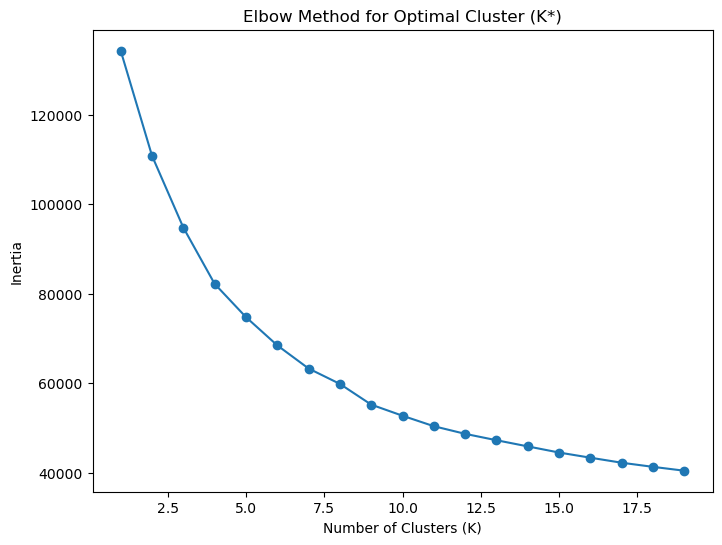

In [21]:
# Columns of interest are 1-16
columns_of_interest = data.columns[1:16]
print (columns_of_interest)
data_of_interest = data[columns_of_interest]

# Impute missing values with the mean of the observed values
imputer_val = SimpleImputer(strategy='mean')
imputed_data = pd.DataFrame(imputer_val.fit_transform(data_of_interest), columns=columns_of_interest)

# Feature normalization using StandardScaler
scaler_obj = StandardScaler()
scaled_data = scaler_obj.fit_transform(imputed_data)

# Experiment with different values of K
inertia_vals = []

for k in range(1, 20):
    clusters = KMeans(n_clusters=k, random_state=42, n_init = 10)
    clusters.fit(scaled_data)
    inertia_vals.append(clusters.inertia_)

# Elbow method to determine optimal K
plt.figure(figsize=(8, 6))
plt.plot(range(1, 20), inertia_vals, marker='o')
plt.title('Elbow Method for Optimal Cluster (K*)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()


------------------------------------------------------------------
Number of Users in Each Cluster:
5    2933
1    2336
0    1333
2    1318
3     954
4      76
Name: Cluster, dtype: int64
------------------------------------------------------------------

Centroid of Each Cluster:
       BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
0   118.769139           0.379623    337.132251        210.526857   
1   779.051109           0.951500    856.510955        196.174225   
2  1902.067785           0.978864   3044.140903       2098.967451   
3  4881.236150           0.965741    539.161895        330.646597   
4  4692.477130           0.973565  16622.873947      11198.460658   
5  1534.356387           0.967400    251.726003        214.914587   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0              126.828050    329.480839             0.263348   
1              660.847551    219.950795             0.867036   
2              945.628687    368.524382   

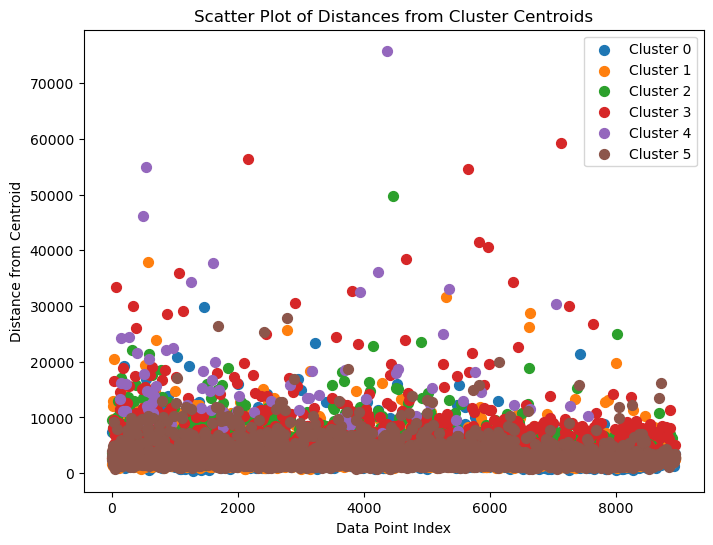

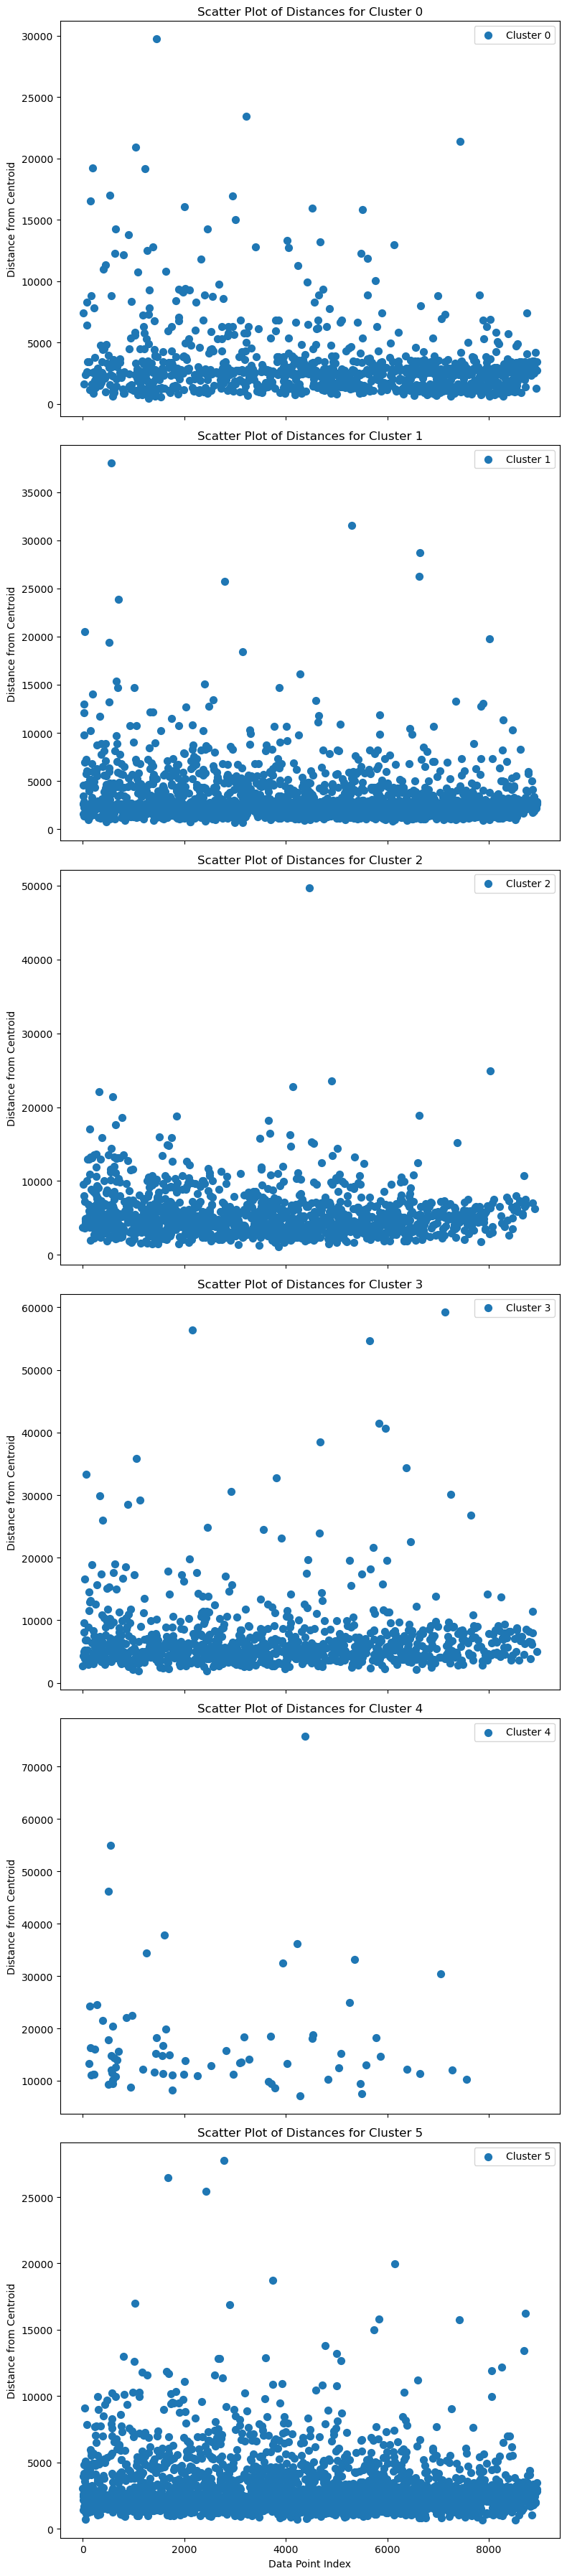

------------------------------------------------------------------


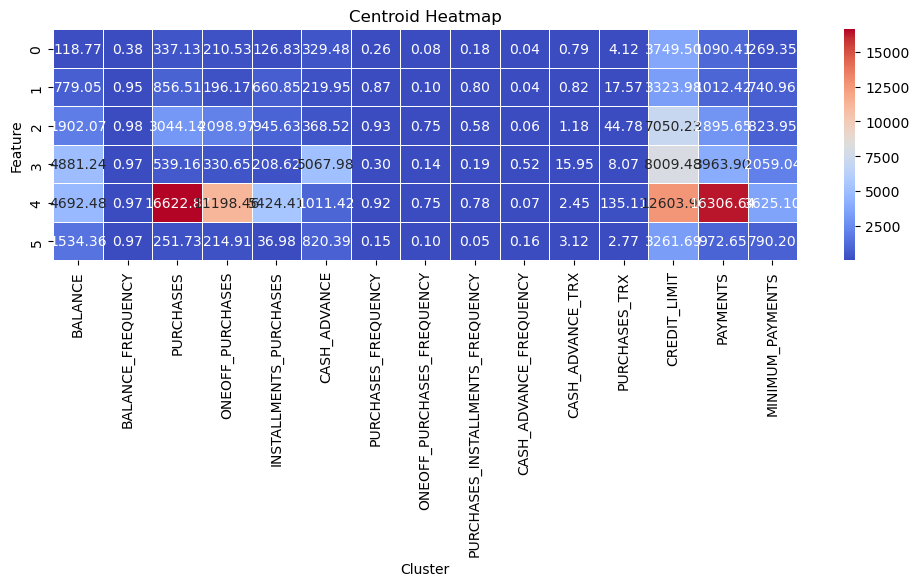

------------------------------------------------------------------

Cluster Analysis in Association with PRC_FULL_PAYMENT and TENURE:
         PRC_FULL_PAYMENT     TENURE
Cluster                             
0                0.228095  11.361590
1                0.239746  11.482021
2                0.273598  11.837633
3                0.039984  11.415094
4                0.389640  11.960526
5                0.028397  11.494033


In [22]:
# Based on the elbow method, choose the optimal K
optimal_cluster_count = 6

# Perform K-Means clustering with optimal K
cluster_optimal = KMeans(n_clusters=optimal_cluster_count, random_state=42, n_init=10)

data['Cluster'] = cluster_optimal.fit_predict(scaled_data)

# Number of users in each cluster
users_count_per_cluster = data['Cluster'].value_counts()

# Centroid of each cluster
centroids = pd.DataFrame(scaler_obj.inverse_transform(cluster_optimal.cluster_centers_), columns=columns_of_interest)

# Display results
print("------------------------------------------------------------------")
print(f"Number of Users in Each Cluster:\n{users_count_per_cluster}")

print("------------------------------------------------------------------")
print("\nCentroid of Each Cluster:")
print(centroids)

print("------------------------------------------------------------------")

# Scatter plot of each point's distance from its cluster centroid
plt.figure(figsize=(8, 6))

for i in range(optimal_cluster_count):
    cluster_data = data[data['Cluster'] == i][columns_of_interest]
    distances = np.linalg.norm(cluster_data - centroids.iloc[i], axis=1)

    plt.scatter(cluster_data.index, distances, label=f'Cluster {i}', s=50)

plt.title('Scatter Plot of Distances from Cluster Centroids')
plt.xlabel('Data Point Index')
plt.ylabel('Distance from Centroid')
plt.legend()
plt.show()


# Set up the subplots
fig, axes = plt.subplots(optimal_cluster_count, 1, figsize=(8, 6 * optimal_cluster_count), sharex=True)

# Loop over each cluster
for i, ax in enumerate(axes):
    cluster_data = data[data['Cluster'] == i][columns_of_interest]
    distances = np.linalg.norm(cluster_data - centroids.iloc[i], axis=1)

    ax.scatter(cluster_data.index, distances, label=f'Cluster {i}', s=50)
    
    ax.set_title(f'Scatter Plot of Distances for Cluster {i}')
    ax.set_ylabel('Distance from Centroid')
    ax.legend()

# Set common x-axis label
axes[-1].set_xlabel('Data Point Index')

plt.tight_layout()
plt.show()


print("------------------------------------------------------------------")

# Create a heatmap using seaborn
plt.figure(figsize=(12, 3))
sns.heatmap(centroids, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title("Centroid Heatmap")
plt.xlabel('Cluster')
plt.ylabel('Feature')
plt.show()

# Analyze the clusters in association with percent of full payment and tenure
print("------------------------------------------------------------------")
cluster_analysis = data.groupby('Cluster')[['PRC_FULL_PAYMENT', 'TENURE']].mean()
print("\nCluster Analysis in Association with PRC_FULL_PAYMENT and TENURE:")
print(cluster_analysis)


First of all we do data exploration and find that there are some missing data. Thus, we impute the missing values with the mean of the observed values.
Then we use StandardScaler for feature normalisation to scale the features. We use different values of number of clusters and use the elbow method to find the optimal number of clusters. K-Means clustering is performed with the optimal K, and each data point is assigned to a cluster. We then analyze the clusters, including the number of users in each cluster, the centroids of each cluster, and the scatter of each cluster.

Optimal number of clusters = 6 as after this inertia values start decreasing slowly.

The analysis of the clusters based on the provided output:
Cluster Sizes:
Cluster 0: 1333 users
Cluster 1: 2336 users
Cluster 2: 1318 users
Cluster 3: 954 users
Cluster 4: 76 users
Cluster 5: 2933 users

The largest cluster is Cluster 5, followed by Clusters 1, 0, 2, 3, and 4.
BALANCE: Clusters 3 and 4 have significantly higher average balances compared to the other clusters.
BALANCE_FREQUENCY: Cluster 2 has the highest average balance frequency.
PURCHASES: Cluster 4 has significantly higher average purchases compared to the other clusters.
CASH_ADVANCE: Clusters 3 and 4 have higher average cash advance amounts compared to the other clusters.
PURCHASES_TRX: Cluster 4 has a much higher average number of purchase transactions compared to the other clusters.
CREDIT_LIMIT: Cluster 4 has a higher average credit limit compared to the other clusters.
PAYMENTS: Cluster 4 has substantially higher average payment amounts compared to the other clusters.
MINIMUM_PAYMENTS: Cluster 4 has a higher average minimum payments compared to the other clusters.

Overall, Cluster 0 has low balance, low purchases, low cash advance, moderate credit limit. Cluster 1 has moderate balance, moderate purchases, low cash advance, moderate credit limit. Cluster 2 has high balance, high purchases, moderate cash advance, high credit limit, moderate payments. Cluster 3 has high balance, moderate purchases, high cash advance, high credit limit, high payments, high minimum payments. Cluster 4 has Very high purchases and credit limit, high payments, high minimum payments. Cluster 5 has moderate balance, very low purchases, low cash advance, low credit limit.

Users in Cluster 0 have a moderate average value for PRC_FULL_PAYMENT (0.228), indicating a moderate proportion of users making full payments of their purchases. The average TENURE for users in Cluster 0 is 11.362, suggesting a moderate association or relationship period with the service.

Cluster 1 has a slightly higher average value for PRC_FULL_PAYMENT (0.240) compared to Cluster 0, indicating a slightly higher proportion of users making full payments. The average TENURE for users in Cluster 1 is 11.482, suggesting a slightly longer association or relationship period compared to Cluster 0.

Users in Cluster 2 have a higher average value for PRC_FULL_PAYMENT (0.274), indicating a higher proportion of users making full payments of their purchases. The average TENURE for users in Cluster 2 is 11.838, suggesting a longer association or relationship period with the service.

Cluster 3 has the lowest average value for PRC_FULL_PAYMENT (0.040), indicating the lowest proportion of users making full payments. The average TENURE for users in Cluster 3 is 11.415, suggesting a moderate association or relationship period with the service.

Users in Cluster 4 have a very high average value for PRC_FULL_PAYMENT (0.390), indicating a very high proportion of users making full payments. The average TENURE for users in Cluster 4 is 11.961, suggesting the highest association or relationship period with the service.

Cluster 5 has the lowest average value for PRC_FULL_PAYMENT (0.028), indicating a very low proportion of users making full payments. The average TENURE for users in Cluster 5 is 11.494, suggesting a slightly longer association or relationship period compared to Cluster 3.

### (d) K-Means Clustering using a different combination of features 

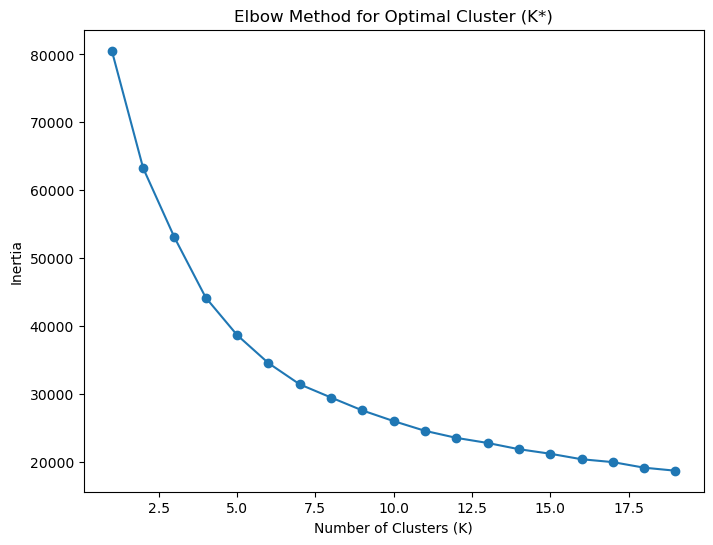

In [23]:
# Columns of interest
selected_columns_of_interest = [
    'PURCHASES',
    'ONEOFF_PURCHASES',
    'INSTALLMENTS_PURCHASES',
    'CASH_ADVANCE',
    'PURCHASES_FREQUENCY',
    'ONEOFF_PURCHASES_FREQUENCY',
    'CASH_ADVANCE_FREQUENCY',
    'CREDIT_LIMIT',
    'PAYMENTS'
]
data_of_interest = data[selected_columns_of_interest]

# Impute missing values with the mean of the observed values
imputer_val = SimpleImputer(strategy='mean')
imputed_data = pd.DataFrame(imputer_val.fit_transform(data_of_interest), columns=selected_columns_of_interest)

# Feature normalization using StandardScaler
scaler_obj = StandardScaler()
scaled_data = scaler_obj.fit_transform(imputed_data)

# Experiment with different values of K
inertia_vals = []

for k in range(1, 20):
    clusters = KMeans(n_clusters=k, random_state=42, n_init = 10)
    clusters.fit(scaled_data)
    inertia_vals.append(clusters.inertia_)

# Elbow method to determine optimal K
plt.figure(figsize=(8, 6))
plt.plot(range(1, 20), inertia_vals, marker='o')
plt.title('Elbow Method for Optimal Cluster (K*)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()


We have selected the following features because of high correlation that we can see from the heatmap created in the second step. 
PURCHASES has High Correlation with Target. It has a relatively high positive correlation (0.68) with other features and is considered a significant indicator of customer behavior. It epresents the total amount of purchases made by the user, capturing their overall purchasing activity. 
ONEOFF_PURCHASES has a strong positive correlation (0.92) with PURCHASES, indicating it complements the overall purchase behavior.It captures the amount spent on one-off purchases, providing insights into specific, non-recurring buying patterns. 
INSTALLMENTS_PURCHASES has high Correlation with PURCHASES and reflects the amount spent on purchases made in installments, contributing to understanding user preferences in payment methods.
CASH_ADVANCE has Low Correlation with Purchases indicating independence from purchase behavior. It represents the amount of cash advance taken by the user, providing insights into cash management habits. 
PURCHASES_FREQUENCY indicates how often purchases are made, offering insights into user engagement and eflects the frequency of user purchases, capturing the regularity of their buying behavior.
ONEOFF_PURCHASES_FREQUENCY has moderate Correlation with ONEOFF_PURCHASES and complements ONEOFF_PURCHASES, providing information on the frequency of specific purchases. It captures the frequency of one-off purchases, distinguishing between regular and occasional high-value transactions.
CASH_ADVANCE_FREQUENCY has low Correlation with Purchasesand represents the frequency of cash advances, offering insights into how often users resort to cash withdrawals.
CREDIT_LIMIT has moderate Correlation with PURCHASES and represents the maximum amount a user can spend, influencing their purchasing behavior.
PAYMENTS has moderate Correlation with PURCHASES and reflects the total payments made by the user, contributing to understanding their financial transactions.
The selection is based on a balance between correlation values, relevance to purchasing behavior, and independence from each other to avoid redundancy in information capture.

------------------------------------------------------------------
Number of Users in Each Cluster:
1    7252
0    1698
Name: Cluster, dtype: int64
------------------------------------------------------------------

Centroid of Each Cluster:
     PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  CASH_ADVANCE  \
0  3521.693498       2329.621814             1192.466855    851.478356   
1   413.520091        185.689000              228.109032   1008.699146   

   PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  CASH_ADVANCE_FREQUENCY  \
0             0.914916                    0.686115                0.090706   
1             0.390942                    0.089213                0.145549   

   CREDIT_LIMIT     PAYMENTS  
0   7470.570725  3876.546470  
1   3797.613553  1231.282621  
------------------------------------------------------------------


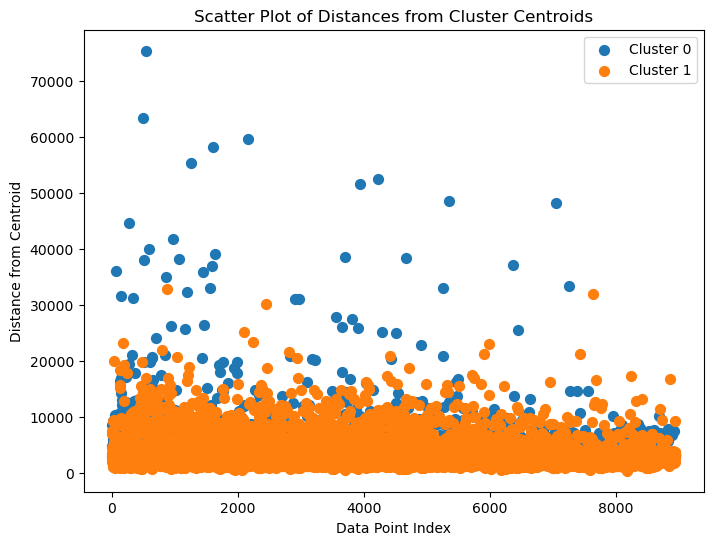

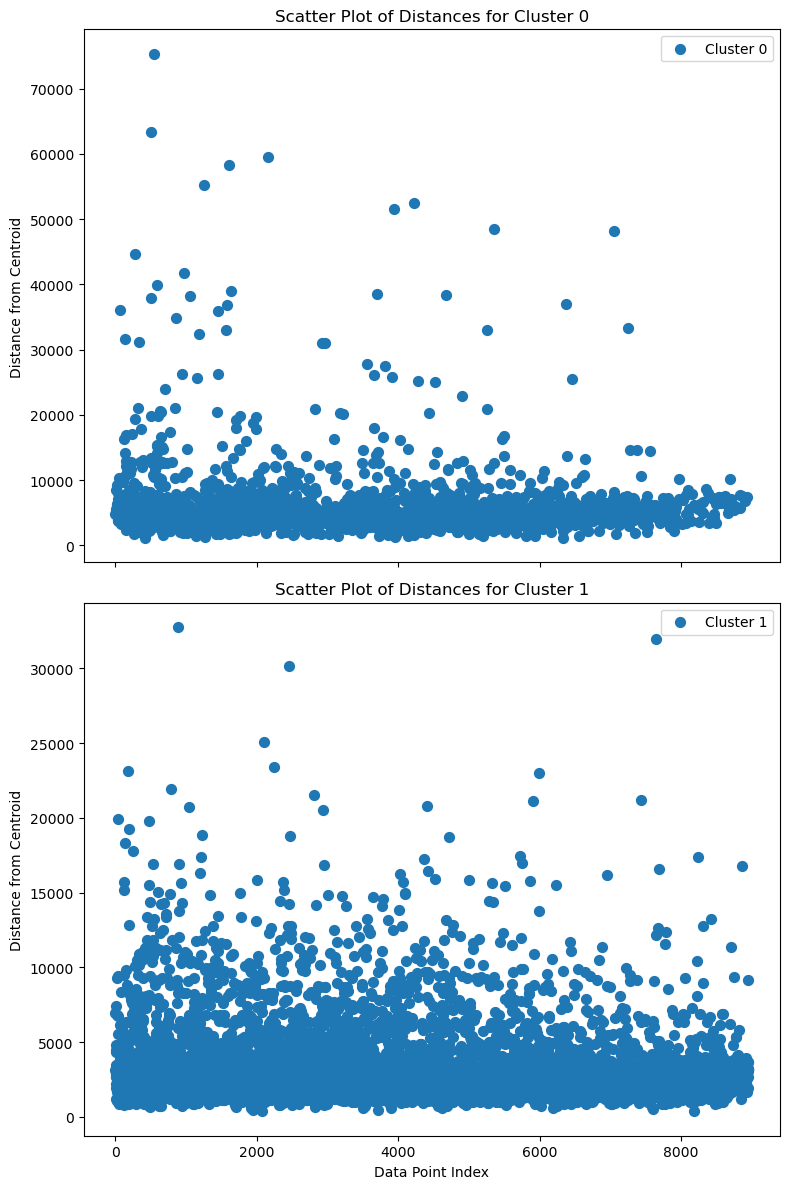

------------------------------------------------------------------


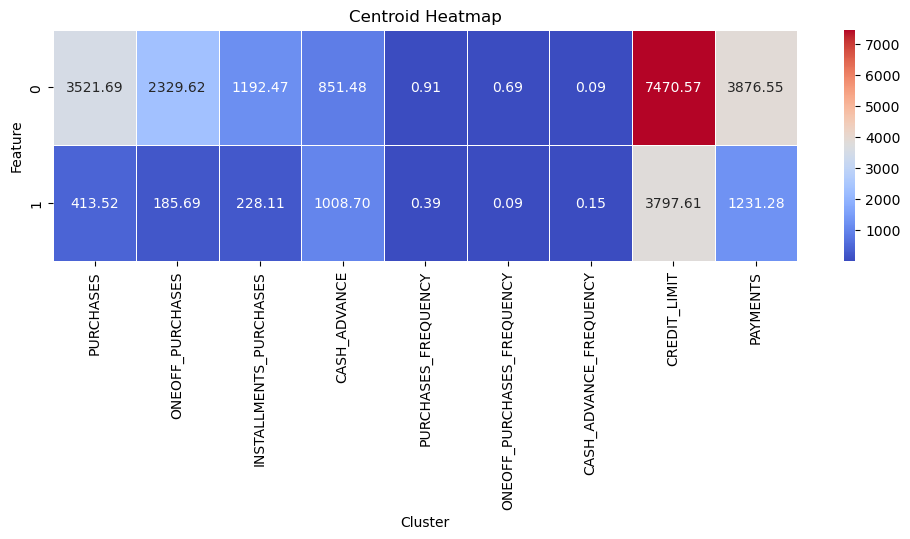

------------------------------------------------------------------

Cluster Analysis in Association with PRC_FULL_PAYMENT and TENURE:
         PRC_FULL_PAYMENT     TENURE
Cluster                             
0                0.264916  11.818021
1                0.127678  11.446911


In [24]:
# Based on the elbow method, choose the optimal K
optimal_cluster_count = 2

# Perform K-Means clustering with optimal K
cluster_optimal = KMeans(n_clusters=optimal_cluster_count, random_state=42, n_init=10)

data['Cluster'] = cluster_optimal.fit_predict(scaled_data)

# Number of users in each cluster
users_count_per_cluster = data['Cluster'].value_counts()

# Centroid of each cluster
centroids = pd.DataFrame(scaler_obj.inverse_transform(cluster_optimal.cluster_centers_), columns=selected_columns_of_interest)

# Display results
print("------------------------------------------------------------------")
print(f"Number of Users in Each Cluster:\n{users_count_per_cluster}")

print("------------------------------------------------------------------")
print("\nCentroid of Each Cluster:")
print(centroids)

print("------------------------------------------------------------------")

# Scatter plot of each point's distance from its cluster centroid
plt.figure(figsize=(8, 6))

for i in range(optimal_cluster_count):
    cluster_data = data[data['Cluster'] == i][selected_columns_of_interest]
    distances = np.linalg.norm(cluster_data - centroids.iloc[i], axis=1)
    
    plt.scatter(cluster_data.index, distances, label=f'Cluster {i}', s=50)

plt.title('Scatter Plot of Distances from Cluster Centroids')
plt.xlabel('Data Point Index')
plt.ylabel('Distance from Centroid')
plt.legend()
plt.show()


# Set up the subplots
fig, axes = plt.subplots(optimal_cluster_count, 1, figsize=(8, 6 * optimal_cluster_count), sharex=True)

# Loop over each cluster
for i, ax in enumerate(axes):
    cluster_data = data[data['Cluster'] == i][selected_columns_of_interest]
    distances = np.linalg.norm(cluster_data - centroids.iloc[i], axis=1)

    ax.scatter(cluster_data.index, distances, label=f'Cluster {i}', s=50)
    
    ax.set_title(f'Scatter Plot of Distances for Cluster {i}')
    ax.set_ylabel('Distance from Centroid')
    ax.legend()

# Set common x-axis label
axes[-1].set_xlabel('Data Point Index')

plt.tight_layout()
plt.show()
print("------------------------------------------------------------------")

# Create a heatmap using seaborn
plt.figure(figsize=(12, 3))
sns.heatmap(centroids, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title("Centroid Heatmap")
plt.xlabel('Cluster')
plt.ylabel('Feature')
plt.show()

# Analyze the clusters in association with percent of full payment and tenure
print("------------------------------------------------------------------")
cluster_analysis = data.groupby('Cluster')[['PRC_FULL_PAYMENT', 'TENURE']].mean()
print("\nCluster Analysis in Association with PRC_FULL_PAYMENT and TENURE:")
print(cluster_analysis)


Optimal number of clusters = 2 as after this inertia values start decreasing slowly.

The analysis of the clusters based on the provided output: 
Cluster Sizes: 
Cluster 1: 7252 Users
Cluster 0: 1698 Users

Cluster 0 has higher values for various purchase-related features, including higher average values for PURCHASES, ONEOFF_PURCHASES, and INSTALLMENTS_PURCHASES. The average CASH_ADVANCE in this cluster is moderate, indicating a mix of users who use both cash advances and make purchases. Users in this cluster make purchases more frequently compared to Cluster 1. Users in Cluster 0, on average, have a higher credit limit compared to users in Cluster 1. Cluster 0 seems to represent users with higher purchase activity and a mix of cash advances, suggesting diverse spending patterns.

Cluster 1 exhibits lower average values for purchase-related features such as PURCHASES, ONEOFF_PURCHASES, and INSTALLMENTS_PURCHASES. Users in this cluster tend to have a higher average CASH_ADVANCE, suggesting a preference for cash transactions over purchases. Users in Cluster 1, despite a higher cash advance, tend to have lower payment amounts. Cluster 1 represents users with lower purchase activity, higher cash advances, and potentially different financial behavior.

Payment Behavior Differences:
Cluster 0 is characterized by a higher likelihood of users making full payments for their purchases, while Cluster 1 has a lower incidence of full payments. Users in Cluster 0 may exhibit more effective financial management or a preference for settling their balances in full.

Tenure Influence: The longer average tenure in Cluster 0 suggests that users who make full payments are likely to have a longer association with the service. While Cluster 1 has a slightly lower average tenure, the overall difference is not substantial.

## Gaussian mixture models.


Gaussian 1:
Mean Vector:
[ 0.31327572  0.31169019  0.16835203 -0.03037191  0.27801603  0.5926359
 -0.09132655  0.22481061  0.2035787 ]

Covariance Matrix:
[[ 1.63468196  1.50800906  1.09424205 -0.0465842   0.43919146  0.5354137
  -0.11338145  0.51726346  0.98926195]
 [ 1.50800906  1.66484054  0.5067703  -0.03837326  0.31040374  0.58699791
  -0.09371872  0.44860212  0.92655749]
 [ 1.09424205  0.5067703   1.65596209 -0.03984544  0.46800784  0.18692814
  -0.09603623  0.39851472  0.63653978]
 [-0.0465842  -0.03837326 -0.03984544  1.27263685 -0.11733567 -0.12389961
   0.72052201  0.30655384  0.68779544]
 [ 0.43919146  0.31040374  0.46800784 -0.11733567  0.78784758  0.58569673
  -0.10054909  0.19067204  0.13563232]
 [ 0.5354137   0.58699791  0.18692814 -0.12389961  0.58569673  1.11982808
  -0.09316776  0.26686283  0.19739507]
 [-0.11338145 -0.09371872 -0.09603623  0.72052201 -0.10054909 -0.09316776
   0.97980684  0.10940804  0.25348985]
 [ 0.51726346  0.44860212  0.39851472  0.30655384  0.1

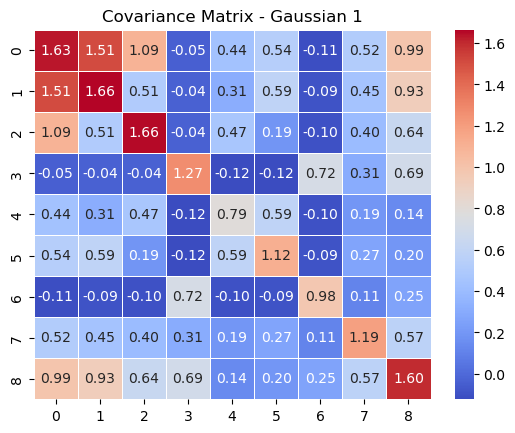


Gaussian 2:
Mean Vector:
[-0.3587497  -0.35693402 -0.19278941  0.03478059 -0.31837184 -0.67866081
  0.10458319 -0.25744331 -0.23312945]

Covariance Matrix:
[[ 3.21031046e-02  3.41022168e-31  7.58460493e-02 -3.37006173e-02
   1.26186966e-01  3.67327364e-31 -5.76038769e-02  3.76312382e-04
   4.56668445e-03]
 [ 3.40242230e-31  1.00000000e-06  1.55609533e-31 -4.53782357e-32
   2.73782022e-31  5.60830800e-31 -6.01261623e-32  2.51092904e-31
   1.85672614e-31]
 [ 7.58460493e-02  1.57027603e-31  1.79198696e-01 -7.96227758e-02
   2.98135682e-01  1.64968794e-31 -1.36097821e-01  8.89094589e-04
   1.07894787e-02]
 [-3.37006173e-02 -5.74790986e-32 -7.96227758e-02  6.85524257e-01
  -3.07186612e-01 -4.76471475e-32  5.16353895e-01  3.17811229e-01
   1.99822283e-01]
 [ 1.26186966e-01  2.64706375e-31  2.98135682e-01 -3.07186612e-01
   1.05307675e+00  2.87395493e-31 -4.84217997e-01 -1.14942488e-01
  -7.24091308e-02]
 [ 3.68272744e-31  5.60830800e-31  1.64968794e-31 -4.04622602e-32
   2.78319846e-31  1.0

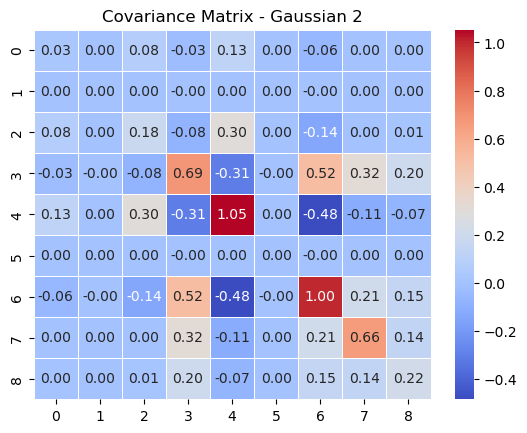

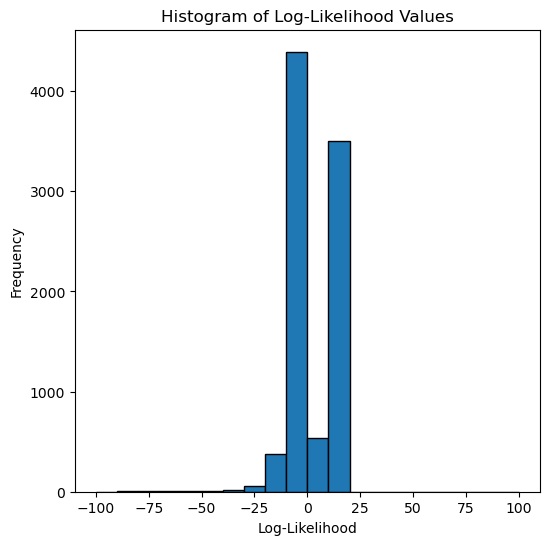

In [25]:
# Load the data
data = pd.read_csv('/Users/shwetimasakshi/Desktop/DF/ML/HW4/data.csv')

# Select relevant features based on findings from (a) and (b)
selected_features = [
    'PURCHASES',
    'ONEOFF_PURCHASES',
    'INSTALLMENTS_PURCHASES',
    'CASH_ADVANCE',
    'PURCHASES_FREQUENCY',
    'ONEOFF_PURCHASES_FREQUENCY',
    'CASH_ADVANCE_FREQUENCY',
    'CREDIT_LIMIT',
    'PAYMENTS'
]

# Select data of these features
selected_data = data[selected_features]

# Impute missing values with the mean of the observed values
imputer_val = SimpleImputer(strategy='mean')
selected_data = pd.DataFrame(imputer_val.fit_transform(selected_data), columns=selected_features)


# Standardize the data
scaler_obj = StandardScaler()
scaled_data = scaler_obj.fit_transform(selected_data)

# Optimal number of clusters found in d = 2
optimal_clusters = 2

gmm_model = GaussianMixture(n_components=optimal_clusters, random_state=42)
gmm_model.fit(scaled_data)

# Display mean vector and covariance matrix for each Gaussian
for i in range(optimal_clusters):
    mean_vector = gmm_model.means_[i]
    cov_matrix = gmm_model.covariances_[i]
    
    print(f"\nGaussian {i + 1}:\nMean Vector:\n{mean_vector}\n\nCovariance Matrix:")
    print(cov_matrix)
    print ('\nCovariance Matrix(heatmap):')
    
    sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
    plt.title(f'Covariance Matrix - Gaussian {i+1}')
    
    plt.show()

# Compute log-likelihood for each sample
log_likelihood = gmm_model.score_samples(scaled_data)

bin_edges = np.arange(-100, 101, 10)
plt.figure(figsize=(6, 6))
plt.hist(log_likelihood, bins=bin_edges, edgecolor='black')  # Use bin_edges
plt.title('Histogram of Log-Likelihood Values')
plt.xlabel('Log-Likelihood')
plt.ylabel('Frequency')
plt.show()

    


From the above output we can conclude that Gaussian 1 has positive values in most dimensions, indicating above-average values. Gaussian 2 has negative values in most dimensions, indicating below-average values. The values in the covariance matrices are significantly different, suggesting different patterns of variability between the two Gaussians. Differences in covariances indicate different relationships between pairs of features. Differences in covariance matrices also suggest different patterns of variability between the two Gaussians.

The log-likelihood values are indicative of how well each data point fits the Gaussian Mixture Model. A higher log-likelihood indicates a better fit. 

1. The above log-likelihood values appear to vary widely, ranging from negative to positive values. Positive log-likelihood values suggest that the corresponding data points are well-described by the GMM. Negative log-likelihood values indicate that the model might not be the best fit for those particular data points.

2. Larger magnitude (absolute value) log-likelihood values generally indicate a better fit. Values close to zero or small in magnitude may suggest that the data point is not well-explained by the GMM.

3. Extremely low log-likelihood values may indicate outliers or points that the GMM struggles to model accurately. The log-likelihood values contribute to assessing the overall performance of the GMM. The goal is to maximize the total log-likelihood across all data points.

4. We have an evenly distributed histogram of log-likelihood values around 0. It suggests that the Gaussian Mixture Model (GMM) is providing a relatively consistent fit across the dataset. The model is neither consistently overfitting nor underfitting the data. The fact that log-likelihood values are both positive and negative indicates that some data points are well-explained by the model (positive values), while others might not fit as well (negative values).
Thus, an even distribution of log-likelihood values around 0 is a positive indication of the GMM's performance. 
